# Basic Statistics and Data Visualization

**This module aims to teach you how you can calculate basics statistics and preform basic visualizations**

Importing the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

LEGO is a popular brand of toy building bricks. They are often sold in sets with in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This is a very rich dataset that offers lots of rooms for exploration, especially since the “sets” file includes the year in which a set was first released. 

This dataset has the following files:

- colors.csv
- inventories.csv
- inventory_parts.csv
- inventory_sets.csv
- part_categories.csv
- parts.csv
- sets.csv
- themes.csv

The one that we are going to explore is the *sets.csv*.

This file contains information on LEGO sets, including a unique ID number, the name of the set, the year it was released, its theme id code and how many parts it includes. 

*Source*: [LEGO Database](https://www.kaggle.com/rtatman/lego-database?select=sets.csv)

<img src="media/lego.webp">

Importing the data to the learning notebook

In [4]:
lego = pd.read_csv('data/sets.csv')

Let's see what the first five rows of our data look like

In [5]:
lego.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


What's the dimension of our data?

In [6]:
lego.shape

(11673, 5)

## Basic Stats

### Extremes and their indexes

What are the maximum and minimum values for the number of parts? And which sets do those values correspond to?

Let's find out

The maximum number of parts can be obtained very easily using the max() method:

In [7]:
lego.num_parts.max()

5922

Which set(s) has/have 5922 parts? To (partially) answer that question, we can use the idxmax() method, which tells us the first index of the maximum value of an array:

In [8]:
lego.num_parts.idxmax()

170

Note that 170 is the first index in the DataFrame for which the number of parts is maximum. Have a look at the our data at the 170 row,

In [9]:
lego.iloc[170]

set_num        10189-1
name         Taj Mahal
year              2008
theme_id           276
num_parts         5922
Name: 170, dtype: object

A one-line-answer for the question "which `set_num` has the maximum number of parts" can be written as:

In [10]:
lego.loc[lego.num_parts.idxmax(), 'set_num']

'10189-1'

Of course, there are also the methods min() and idxmin().

In [11]:
lego.num_parts.idxmin()

1683

In [12]:
lego.num_parts.min()

-1

There are entries which have -1 parts! This is why data understanding is so important and why very basic statistics can help us finding data problems.

You might be wondering if there are more than one set with -1 parts in the DataFrame. As mentioned above, the idxmin() will only output the first index for which the number of parts is minimum.

In a real work using data, we should clean our dataset and try to find a solution for the entries with wrong values

### Mode, Mean and Median

What is the mode?

Analytically

<img src="media/Mode-1.png">

Visually

<img src="media/histogram.webp">

"What is the year that had more sets published?"

In [13]:
lego.year.mode()

0    2014
dtype: int64

We can do this for non-numerical data as well. 

In [14]:
lego.name.mode()

0    Basic Building Set
dtype: object

What is the mean?

<img src="media/Mean-Formula.jpg">

What is the average number of parts in the sets of legos?

To answer this question we can check the mean and median,

In [15]:
lego.num_parts.mean()

162.26240041120533

What is the median?

<img src="media/3.png">

A small example

<img src="media/Finding_the_median.png">

In [16]:
lego.num_parts.median()

45.0

The median and mean are quite different! why is that?

Due to existence of these outliers, we see that **mean > median**. In practice, the mean can be highly affected by the existence of **outliers**, whereas the median is not strongly influenced by outliers.

When to use each? 

* The median may be a better indicator of the **most typical value** if a set has outliers.

* As the data becomes skewed *(see next)* the mean loses its ability to provide the best central location for the data because the skewed data is dragging it away from the typical value. However, the **median best retains this position** and is not as strongly influenced by the outliers.

* However, when the **sample size is large and does not include outliers**, the mean score usually provides a better measure of central tendency.

The mode, mean and median

<img src="media/mean-median-mode.png">

### Standard Deviation and Variance

What is the Standard Deviation and Variance?

<img src="media/unnamed.gif">

The standard deviation is a numerical value used to indicate how widely individuals in a group vary. If individual observations vary greatly from the group mean, the standard deviation is big; and vice versa.

In [17]:
lego.num_parts.std()

330.19210808907

To calculate the variance,

In [18]:
lego.num_parts.var()

109026.8282443041

### Other useful methods

A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit. Special quantiles are the quartile (quarter), the quintile (fifth) and percentiles (hundredth).

To calculate quantiles, you simply can use the method quantile,

In [19]:
quintiles = [0.05, 0.25, 0.5, 0.75, 0.95]
lego.num_parts.quantile(q=quintiles)

0.05      1.0
0.25     10.0
0.50     45.0
0.75    172.0
0.95    704.0
Name: num_parts, dtype: float64

As usual, pandas has something extremely helpeful. It's the describe() method. It gives you a summary of what your variable looks like. It's easy to have a look and spot some things you might explore later on.

In [20]:
lego.num_parts.describe()

count    11673.000000
mean       162.262400
std        330.192108
min         -1.000000
25%         10.000000
50%         45.000000
75%        172.000000
max       5922.000000
Name: num_parts, dtype: float64

### Other Resources

If you wanna further explore Statistics with Pandas, check this links: 

* [Statistical Functions of Pandas](https://medium.com/swlh/statistical-functions-of-pandas-2862c290053a)

* [Basic of Correlations](https://medium.com/analytics-vidhya/basic-of-correlations-and-using-pandas-and-scipy-for-calculating-correlations-2d16c2bd6af0)

## Data Visualization

Matplotlib is a library initially designed to save charts to files, we usually use the submodule `pyplot` to plot things or customize plots. The convention is importing it as plt, same way as we shorten pandas as pd. (saves a few keystrokes!).

When plotting charts on a jupyter notebook we have tell jupyter that we want to render the plots inside the notebook.

The most common way to specify this is by using one jupyter notebook [magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html), which are ways to modify the default behavior of the notebook.

`%matplotlib inline` will set up the notebook to be used with matplotlib.

**Note** This is not required when using Jupyter Lab.

In [21]:
%matplotlib inline

We can use a scatter plot to see the relationship between the number of parts sold and the year of the set

<AxesSubplot:xlabel='year', ylabel='num_parts'>

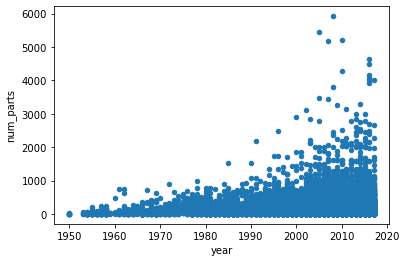

In [22]:
lego.plot.scatter(x='year', y='num_parts')

**Note**: You see that I add a semicolon (;) at the end of the cell, that is because jupyter notebooks by default return the last value., so if I run the cell without the notebook, the plot object *(some random thing like `matplotlib.axes._subplots.AxesSubplot..`)* will be displayed.

Depending on your browser and your screen resolution, you might think that the previous chart is small. We can fix this by changing the matplotlib options to render bigger charts.

We can set the chart size globally by changing the matplotlib default settings. These are included in the dictionary `plt.rcParams`.

The plot size is defined as a list with 2 elements, `[width, height]` in inches

So the default chart size is 6 inches wide by 4 inches tall, which is fairly small.

For example, if we want to set the chart size as 10 inches wide by 10 inches high, we would do so as:

In [23]:
plt.rcParams["figure.figsize"] = [14, 14]

<AxesSubplot:xlabel='year', ylabel='num_parts'>

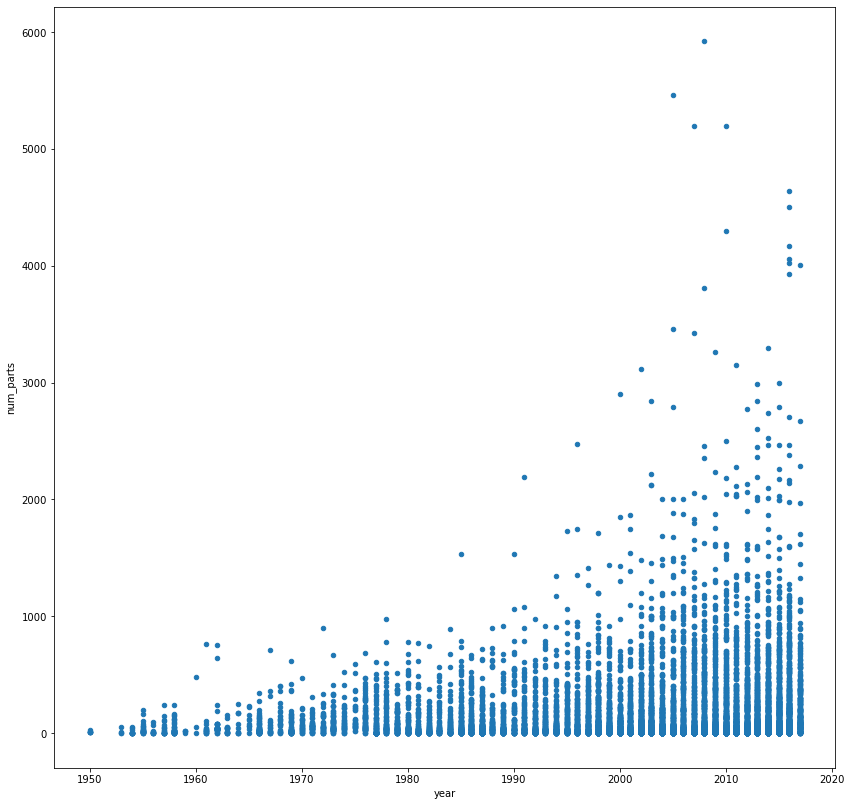

In [24]:
lego.plot.scatter(x='year', y='num_parts')

Let's bring it again to default size

For the types of charts that pandas supports we can use a different function to plot them using the `kind` argument.

For example we can plot the same scatter plot as above by doing:

<AxesSubplot:xlabel='year', ylabel='num_parts'>

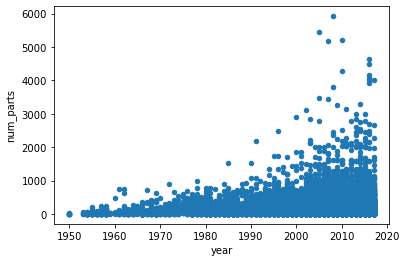

In [25]:
plt.rcParams["figure.figsize"] = [6, 4]
lego.plot(x='year', y='num_parts', kind = 'scatter')

Pandas plotting library is just a thin wrapper around matplotlib. Matplotlib has a somewhat convoluted api, and pandas makes plotting common charts much easier.

For example, here we call directly matplotlib `legend` to display the legend on top of pandas plots

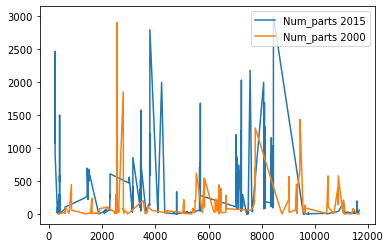

In [26]:
lego[lego.year==2015].num_parts.plot(label="Num_parts 2015")
lego[lego.year==2000].num_parts.plot(label="Num_parts 2000")
plt.legend();

We can use histograms to make sure that nothing is fishy with the data, as well as to gain an understanding of its distribution. For example, we can use it to see how are the theme_id of 100 distributed over the years

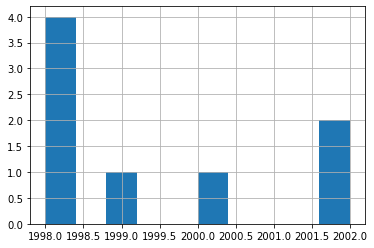

In [27]:
lego[lego.theme_id==100].year.hist();

Using matplotlib api

Sometimes, we want to display some information in a way that pandas `plot` method doesn't allow us to. In those situations we can use matplotlib plt.plot method directly as well. This gives us much more flexibility regarding how we can display the data

Text(0, 0.5, 'Number of parts')

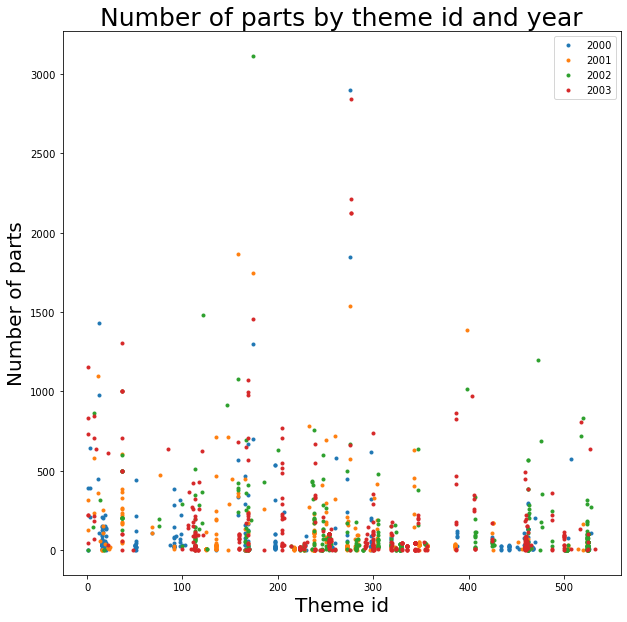

In [28]:
plt.rcParams["figure.figsize"] = [10, 10]
for year in range(2000,2004):
    plt.plot(lego[lego.year == year].theme_id,  # plot this series as the x
             lego[lego.year == year].num_parts,    #plot this series as the y
             marker='o',   #make the markers circle shaped
             linestyle='', #don't connect the dots with lines
             ms=3,         # size of the markers (in pixels)
             label=year # use the country as the label of this plot
            )

plt.legend()
plt.title("Number of parts by theme id and year", size=25)
plt.xlabel("Theme id", size=20)
plt.ylabel("Number of parts", size=20)

### Other Resources

If you wanna further explore Data Visualization, check this links: 

* [Data Visualization Cheat Sheet](https://towardsdatascience.com/an-ultimate-cheat-sheet-for-data-visualization-in-pandas-4010e1b16b5c)

* [5 Powerful Visualisation with Pandas for Data Preprocessing](https://towardsdatascience.com/5-powerful-visualisation-with-pandas-for-data-preprocessing-bbf6a2033efd)

* [5 Advanced Visualisation for Exploratory data analysis](https://towardsdatascience.com/5-advanced-visualisation-for-exploratory-data-analysis-eda-c8eafeb0b8cb)

* [Advanced Visualization for Data Scientists with Matplotlib](https://medium.com/sfu-cspmp/advanced-visualization-for-data-scientists-with-matplotlib-15c28863c41c)

In [1]:
print('Well Done!!')

Well Done!!
